# Stock Tweet and Price Analysis

In this notebook, we will analyze stock prices and tweets related to various companies. We will perform data preprocessing, exploratory data analysis (EDA), and implement time series forecasting models.


## Extracting the ZIP File

First, we need to extract the contents of the provided ZIP file to access the datasets.


In [3]:
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt

# Path to the zip file
zip_file_path = 'data/stock-tweet-and-price.zip'
extract_path = 'data/stock-tweet-and-price/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extracted files
extracted_files = os.listdir(extract_path)
print("Files in the extracted directory:", extracted_files)

# Assuming there is an additional nested directory
nested_extract_path = os.path.join(extract_path, 'stock-tweet-and-price')
nested_files = os.listdir(nested_extract_path)
print("Files in the nested extracted directory:", nested_files)


Files in the extracted directory: ['stock-tweet-and-price', 'stockprice', 'stocktweet']
Files in the nested extracted directory: ['stockprice', 'stocktweet']


## Verify the Extracted Files

Let's check the structure of the extracted files to ensure everything is in place.


In [6]:
# Check if 'stockprice' directory exists
stockprice_dir = os.path.join(nested_extract_path, 'stockprice')
if os.path.exists(stockprice_dir) and os.path.isdir(stockprice_dir):
    stockprice_files = os.listdir(stockprice_dir)
    print("Files in the stockprice directory:", stockprice_files)
else:
    print("'stockprice' directory does not exist in the nested extracted path.")

# Correct path to 'stocktweet.csv'
tweets_csv_path = os.path.join(nested_extract_path, 'stocktweet', 'stocktweet.csv')
if os.path.exists(tweets_csv_path):
    tweets_df = pd.read_csv(tweets_csv_path)
    print("First few rows of the tweets dataset:")
    display(tweets_df.head())
else:
    print(f"{tweets_csv_path} does not exist.")


Files in the stockprice directory: ['AAPL.csv', 'ABNB.csv', 'AMT.csv', 'AMZN.csv', 'BA.csv', 'BABA.csv', 'BAC.csv', 'BKNG.csv', 'BRK-A.csv', 'BRK-B.csv', 'CCL.csv', 'CVX.csv', 'DIS.csv', 'FB.csv', 'GOOG.csv', 'GOOGL.csv', 'HD.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'LOW.csv', 'MA.csv', 'MCD.csv', 'META.csv', 'MSFT.csv', 'NFLX.csv', 'NKE.csv', 'NVDA.csv', 'PFE.csv', 'PG.csv', 'PYPL.csv', 'SBUX.csv', 'TM.csv', 'TSLA.csv', 'TSM.csv', 'UNH.csv', 'UPS.csv', 'V.csv', 'WMT.csv', 'XOM.csv', '^GSPC.csv']
First few rows of the tweets dataset:


,id,date,ticker,tweet
0,100001,01/01/2020,AMZN,$AMZN Dow futures up by 100 points already 🥳
1,100002,01/01/2020,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...
2,100003,01/01/2020,AAPL,$AAPL We’ll been riding since last December fr...
3,100004,01/01/2020,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏"
4,100005,01/01/2020,TSLA,"$TSLA haha just a collection of greats...""Mars..."


## Load Stock Price Data

Next, we will load the stock price data for a few selected companies.


In [9]:
# Load stock price data for a few companies to start
companies = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA']
stock_data = {}
for company in companies:
    company_csv_path = os.path.join(stockprice_dir, f'{company}.csv')
    if os.path.exists(company_csv_path):
        stock_data[company] = pd.read_csv(company_csv_path)
        print(f"First few rows of the {company} dataset:")
        display(stock_data[company].head())
    else:
        print(f"{company_csv_path} does not exist.")


First few rows of the AAPL dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


First few rows of the AMZN dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000


First few rows of the GOOG dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000


First few rows of the MSFT dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100


First few rows of the TSLA dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


## Exploratory Data Analysis (EDA)

We will perform exploratory data analysis on the tweets and stock price datasets.


Summary statistics of the tweets dataset:
                 id
count   10000.00000
mean   105000.50000
std      2886.89568
min    100001.00000
25%    102500.75000
50%    105000.50000
75%    107500.25000
max    110000.00000

Missing values in the tweets dataset:
id        0
date      0
ticker    0
tweet     0
dtype: int64


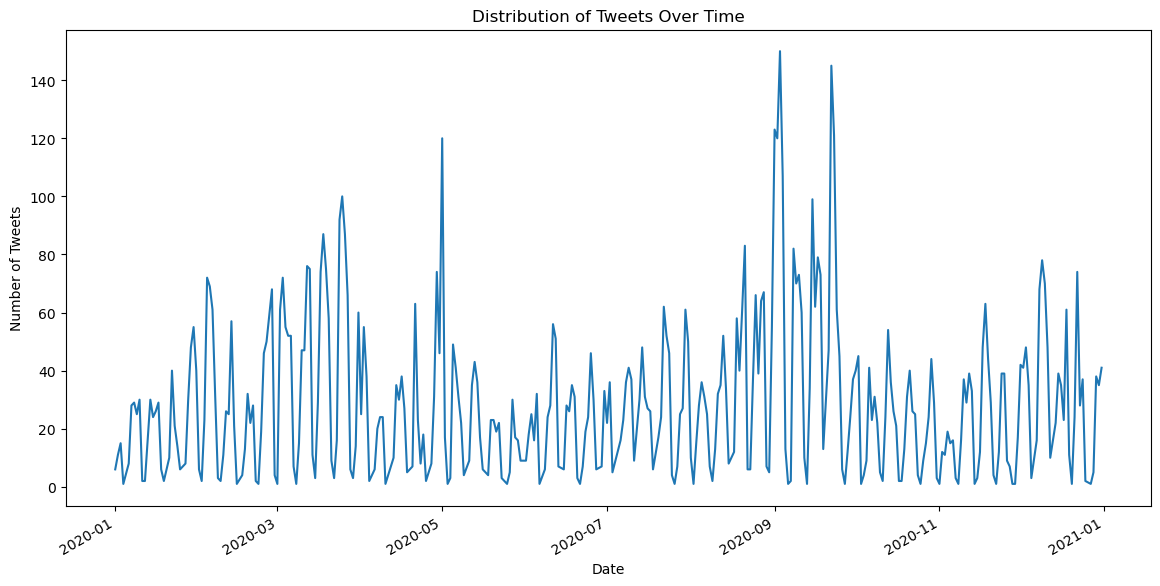

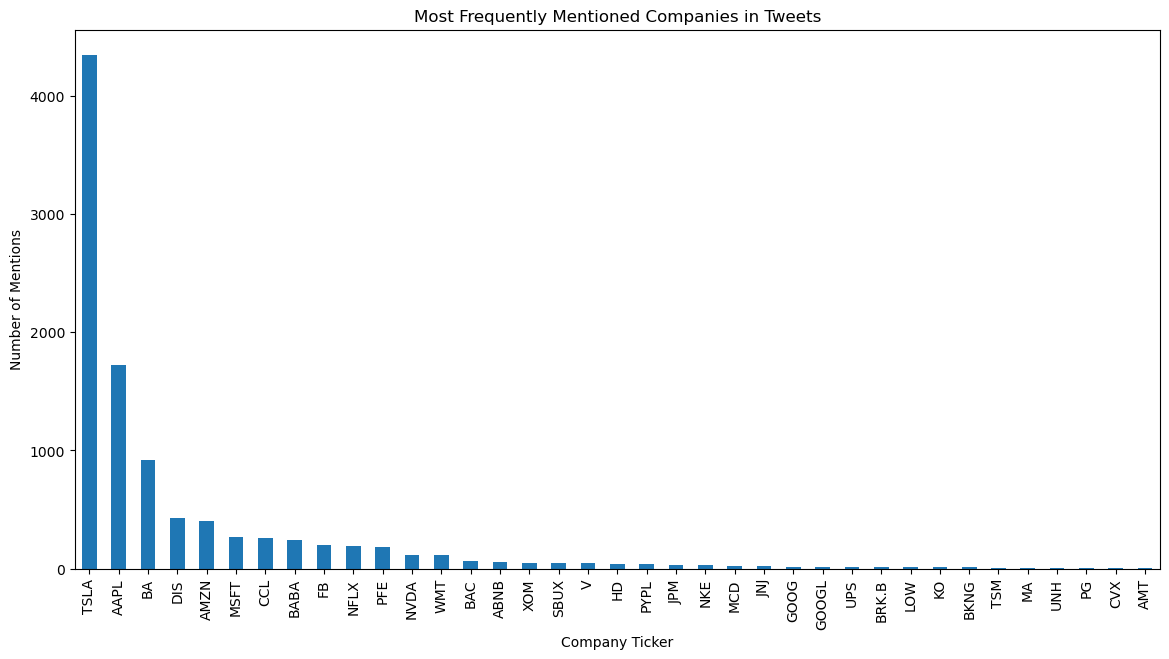


Summary statistics of the AAPL stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    95.177963   96.570266   93.828021   95.260718   93.308248   
std     22.014834   22.099098   21.579560   21.810137   21.574201   
min     57.020000   57.125000   53.152500   56.092499   54.776802   
25%     76.863749   77.998749   76.109377   77.379377   75.390965   
50%     91.264999   92.793751   90.738750   91.421249   89.518562   
75%    115.924374  117.275000  114.129997  115.739374  113.534906   
max    138.050003  138.789993  134.339996  136.690002  134.317825   

             Volume  
count  2.540000e+02  
mean   1.573412e+08  
std    6.978352e+07  
min    4.669130e+07  
25%    1.107637e+08  
50%    1.379199e+08  
75%    1.870393e+08  
max    4.265100e+08  

Missing values in the AAPL stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

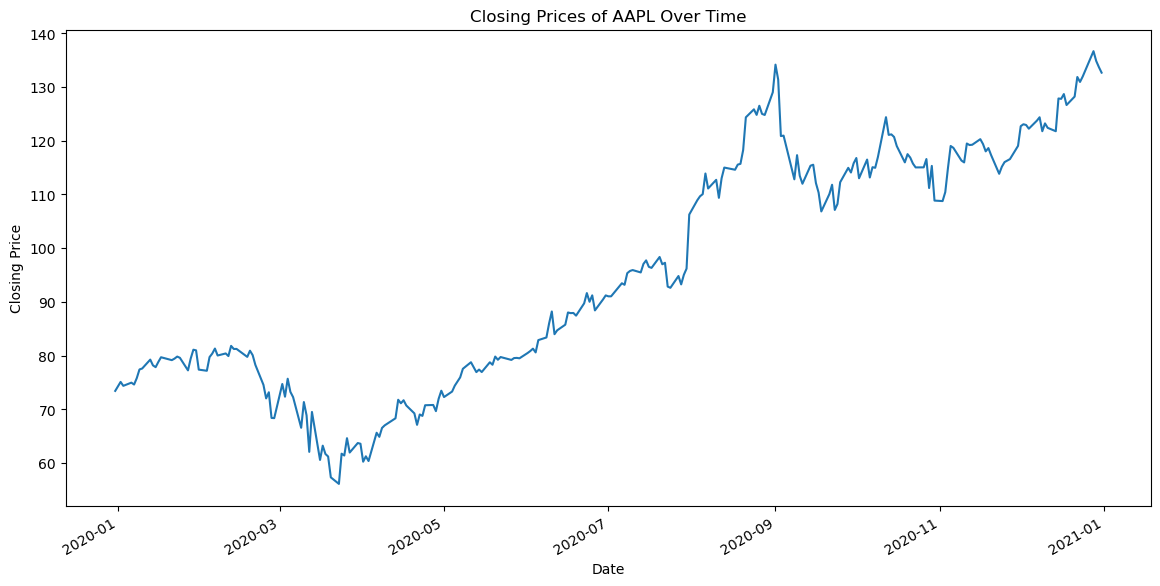


Summary statistics of the AMZN stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean   133.885051  135.677053  131.953638  133.878775  133.878775   
std     27.629617   27.792147   27.046226   27.359174   27.359174   
min     82.075500   87.972504   81.301498   83.830498   83.830498   
25%    106.465124  108.039877  104.851376  106.931000  106.931000   
50%    142.162498  146.264000  140.625000  144.224998  144.224998   
75%    158.976871  160.092003  156.518379  158.250496  158.250496   
max    177.350006  177.612503  174.334503  176.572495  176.572495   

             Volume  
count  2.540000e+02  
mean   9.842891e+07  
std    3.956220e+07  
min    2.903800e+07  
25%    6.937200e+07  
50%    9.038800e+07  
75%    1.157840e+08  
max    3.113460e+08  

Missing values in the AMZN stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

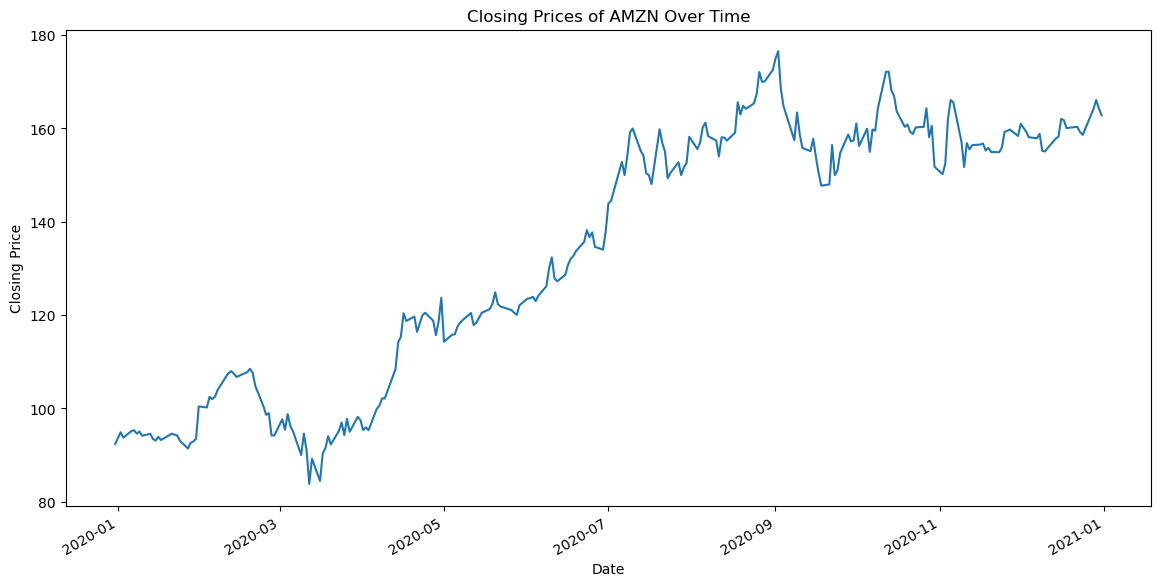


Summary statistics of the GOOG stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    73.948911   74.927242   73.077268   74.041769   74.041769   
std      8.834614    8.740315    8.938780    8.792663    8.792663   
min     52.825500   53.566002   50.676800   52.831001   52.831001   
25%     69.556000   70.593752   68.880697   69.677876   69.677876   
50%     73.553501   74.449001   72.971752   73.767002   73.767002   
75%     78.334503   79.375526   77.291626   78.419374   78.419374   
max     91.225998   92.360001   91.132500   91.399498   91.399498   

             Volume  
count  2.540000e+02  
mean   3.776039e+07  
std    1.536518e+07  
min    6.936000e+06  
25%    2.782400e+07  
50%    3.318000e+07  
75%    4.275700e+07  
max    8.658200e+07  

Missing values in the GOOG stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

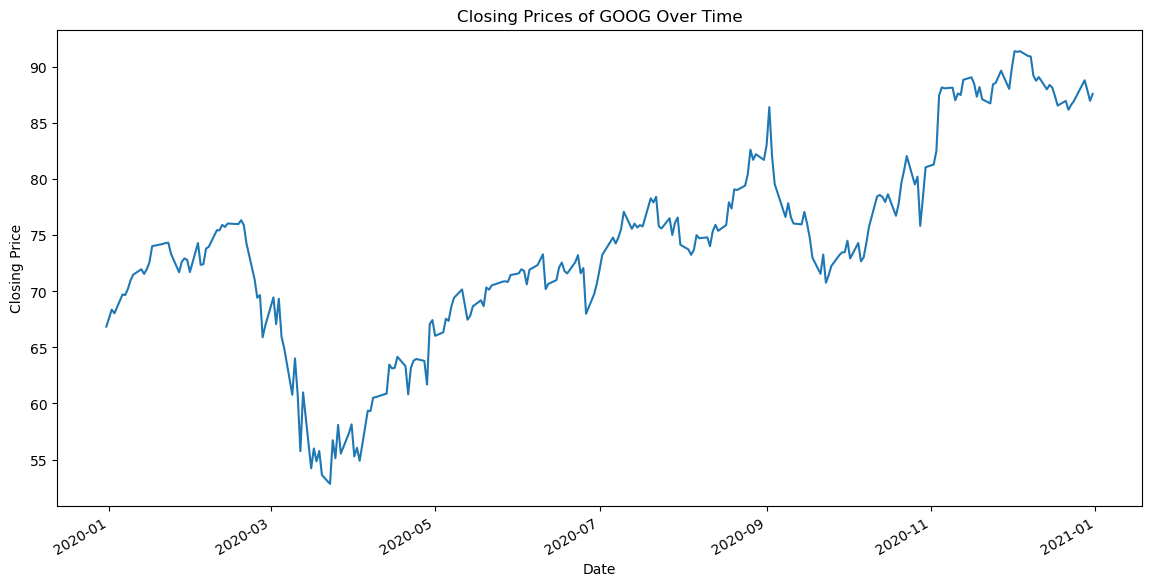


Summary statistics of the MSFT stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean   192.767953  195.316732  190.243858  192.887047  186.920004   
std     23.167684   22.713205   23.334311   23.056863   22.820841   
min    137.009995  140.570007  132.520004  135.419998  130.852295   
25%    174.132500  175.212498  170.842506  174.132504  168.074219   
50%    200.235001  203.799995  197.625000  201.605003  195.347435   
75%    212.922504  214.822498  210.232498  212.742500  206.354980   
max    229.270004  232.860001  227.350006  231.649994  225.002426   

             Volume  
count  2.540000e+02  
mean   3.758365e+07  
std    1.691521e+07  
min    1.055060e+07  
25%    2.608782e+07  
50%    3.278050e+07  
75%    4.374762e+07  
max    9.701270e+07  

Missing values in the MSFT stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

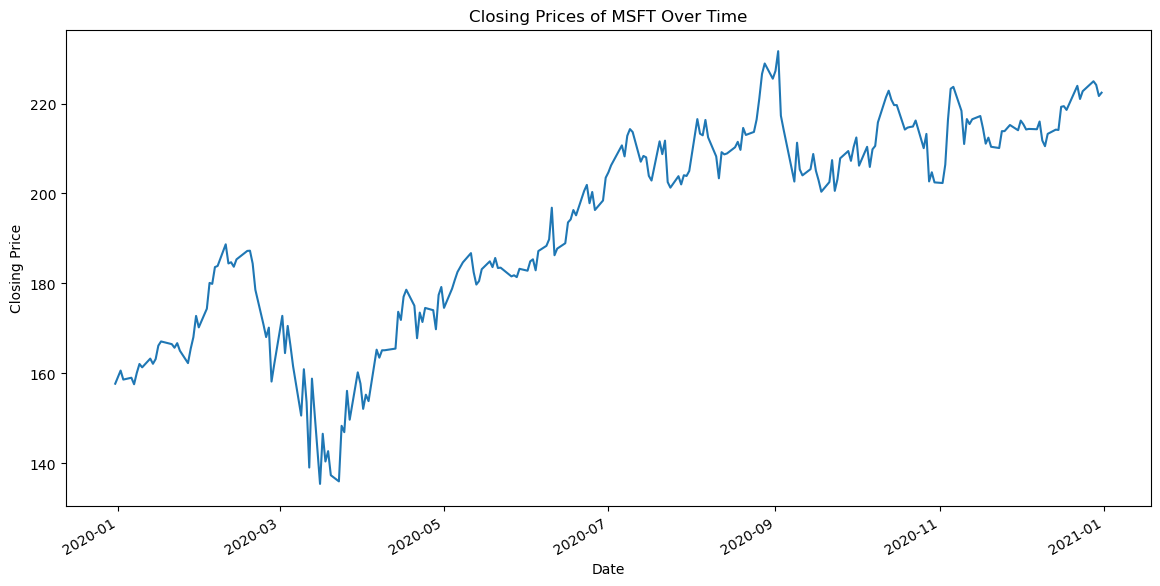


Summary statistics of the TSLA stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    96.096367   98.816569   93.303142   96.394913   96.394913   
std     55.947472   57.294582   54.503561   56.385815   56.385815   
min     24.980000   26.990667   23.367332   24.081333   24.081333   
25%     49.244500   51.554335   47.545667   49.886168   49.886168   
50%     76.815998   78.777668   75.536667   77.609665   77.609665   
75%    140.457500  143.450001  136.811668  140.381660  140.381660   
max    233.330002  239.573334  230.373337  235.223328  235.223328   

             Volume  
count  2.540000e+02  
mean   2.256418e+08  
std    1.202570e+08  
min    5.207310e+07  
25%    1.417980e+08  
50%    2.079998e+08  
75%    2.823401e+08  
max    9.140820e+08  

Missing values in the TSLA stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

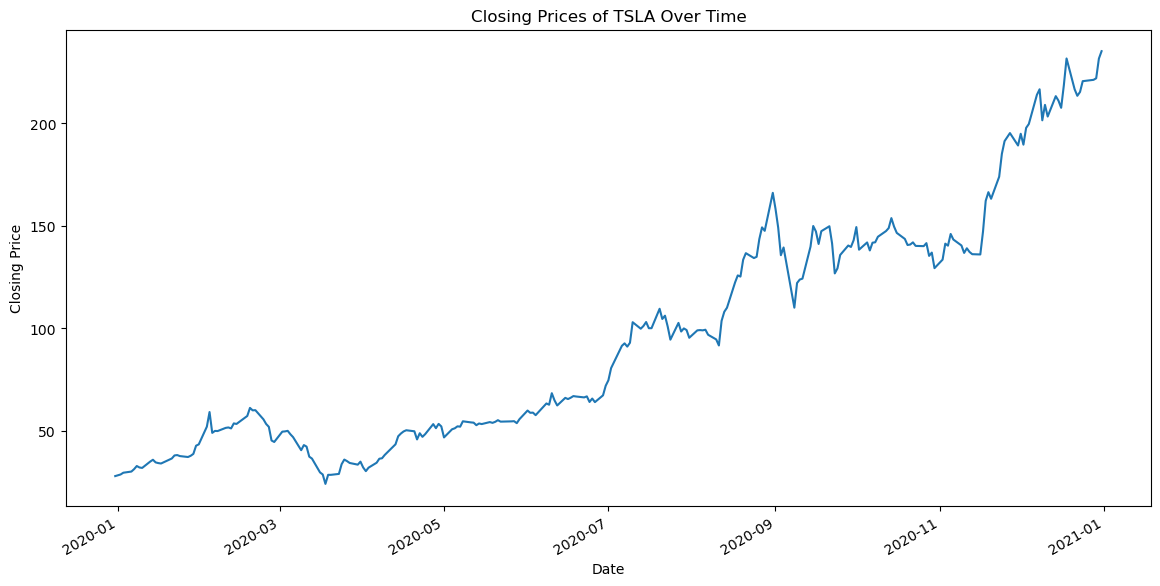

In [12]:
# Exploratory Data Analysis on Tweets Dataset
print("Summary statistics of the tweets dataset:")
print(tweets_df.describe())

print("\nMissing values in the tweets dataset:")
print(tweets_df.isnull().sum())

# Convert the date column to datetime with the correct format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], format='%d/%m/%Y')

# Distribution of tweets over time
tweets_df['date'].value_counts().sort_index().plot(kind='line', figsize=(14, 7), title='Distribution of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

# Most frequently mentioned companies
tweets_df['ticker'].value_counts().plot(kind='bar', figsize=(14, 7), title='Most Frequently Mentioned Companies in Tweets')
plt.xlabel('Company Ticker')
plt.ylabel('Number of Mentions')
plt.show()

# Exploratory Data Analysis on Stock Price Data
for company in companies:
    print(f"\nSummary statistics of the {company} stock price dataset:")
    print(stock_data[company].describe())

    print(f"\nMissing values in the {company} stock price dataset:")
    print(stock_data[company].isnull().sum())

    # Convert the Date column to datetime
    stock_data[company]['Date'] = pd.to_datetime(stock_data[company]['Date'], format='%Y-%m-%d')

    # Plot the closing prices
    stock_data[company].set_index('Date')['Close'].plot(kind='line', figsize=(14, 7), title=f'Closing Prices of {company} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()


Files in the extracted directory: ['stock-tweet-and-price', 'stockprice', 'stocktweet']
Files in the nested extracted directory: ['stockprice', 'stocktweet']
Files in the stockprice directory: ['AAPL.csv', 'ABNB.csv', 'AMT.csv', 'AMZN.csv', 'BA.csv', 'BABA.csv', 'BAC.csv', 'BKNG.csv', 'BRK-A.csv', 'BRK-B.csv', 'CCL.csv', 'CVX.csv', 'DIS.csv', 'FB.csv', 'GOOG.csv', 'GOOGL.csv', 'HD.csv', 'JNJ.csv', 'JPM.csv', 'KO.csv', 'LOW.csv', 'MA.csv', 'MCD.csv', 'META.csv', 'MSFT.csv', 'NFLX.csv', 'NKE.csv', 'NVDA.csv', 'PFE.csv', 'PG.csv', 'PYPL.csv', 'SBUX.csv', 'TM.csv', 'TSLA.csv', 'TSM.csv', 'UNH.csv', 'UPS.csv', 'V.csv', 'WMT.csv', 'XOM.csv', '^GSPC.csv']
First few rows of the tweets dataset:


,id,date,ticker,tweet
0,100001,01/01/2020,AMZN,$AMZN Dow futures up by 100 points already 🥳
1,100002,01/01/2020,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...
2,100003,01/01/2020,AAPL,$AAPL We’ll been riding since last December fr...
3,100004,01/01/2020,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏"
4,100005,01/01/2020,TSLA,"$TSLA haha just a collection of greats...""Mars..."


First few rows of the AAPL dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


First few rows of the AMZN dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000


First few rows of the GOOG dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000


First few rows of the MSFT dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100


First few rows of the TSLA dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


Summary statistics of the tweets dataset:
                 id
count   10000.00000
mean   105000.50000
std      2886.89568
min    100001.00000
25%    102500.75000
50%    105000.50000
75%    107500.25000
max    110000.00000

Missing values in the tweets dataset:
id        0
date      0
ticker    0
tweet     0
dtype: int64


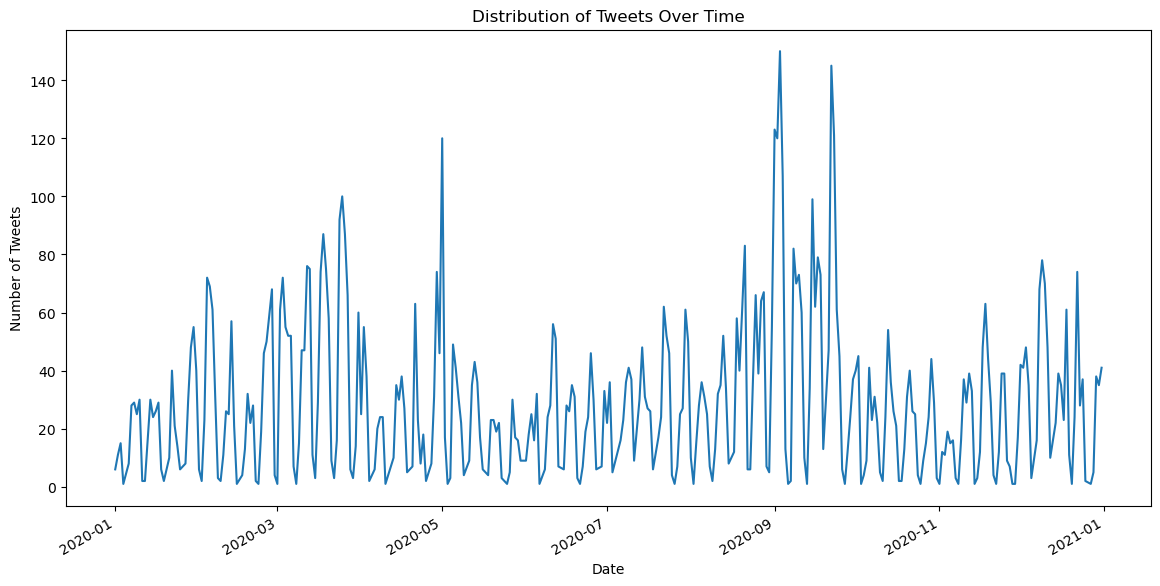

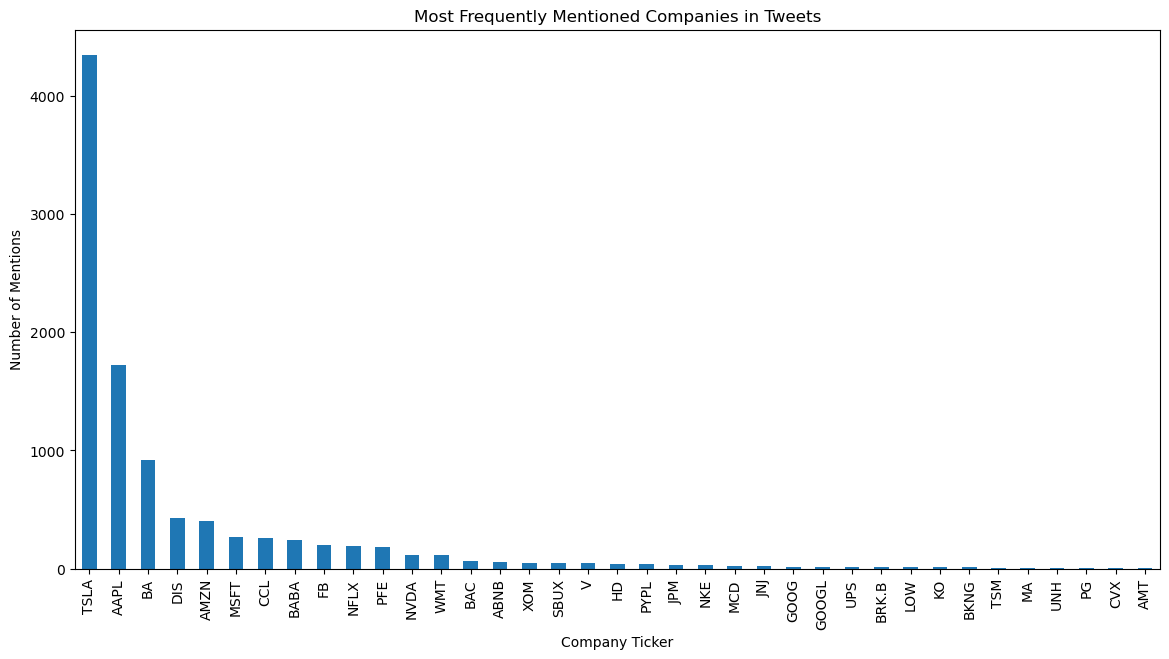


Summary statistics of the AAPL stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    95.177963   96.570266   93.828021   95.260718   93.308248   
std     22.014834   22.099098   21.579560   21.810137   21.574201   
min     57.020000   57.125000   53.152500   56.092499   54.776802   
25%     76.863749   77.998749   76.109377   77.379377   75.390965   
50%     91.264999   92.793751   90.738750   91.421249   89.518562   
75%    115.924374  117.275000  114.129997  115.739374  113.534906   
max    138.050003  138.789993  134.339996  136.690002  134.317825   

             Volume  
count  2.540000e+02  
mean   1.573412e+08  
std    6.978352e+07  
min    4.669130e+07  
25%    1.107637e+08  
50%    1.379199e+08  
75%    1.870393e+08  
max    4.265100e+08  

Missing values in the AAPL stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

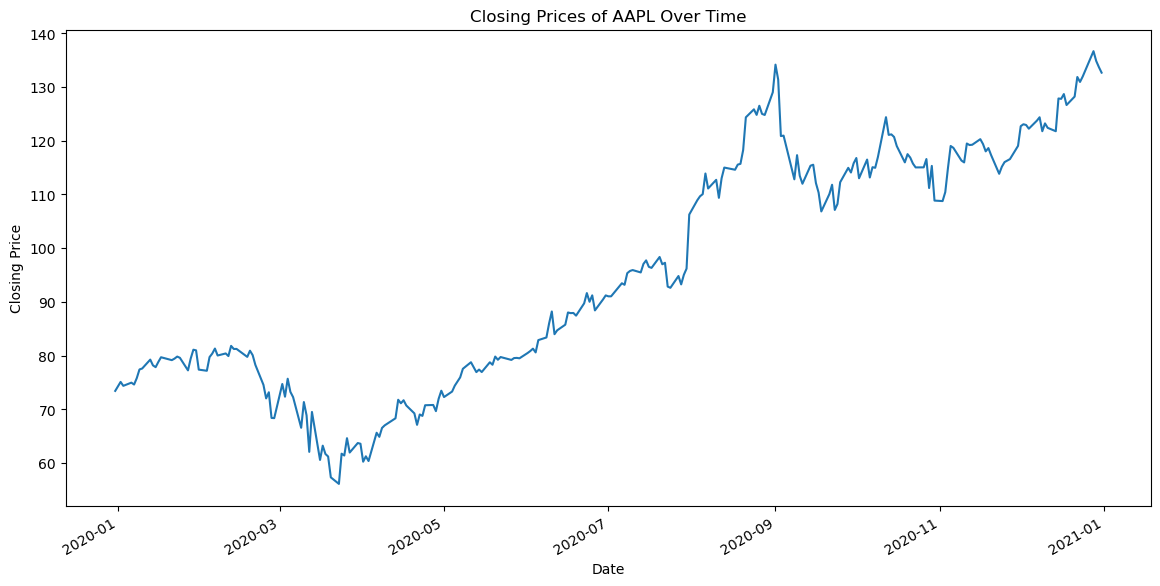


Summary statistics of the AMZN stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean   133.885051  135.677053  131.953638  133.878775  133.878775   
std     27.629617   27.792147   27.046226   27.359174   27.359174   
min     82.075500   87.972504   81.301498   83.830498   83.830498   
25%    106.465124  108.039877  104.851376  106.931000  106.931000   
50%    142.162498  146.264000  140.625000  144.224998  144.224998   
75%    158.976871  160.092003  156.518379  158.250496  158.250496   
max    177.350006  177.612503  174.334503  176.572495  176.572495   

             Volume  
count  2.540000e+02  
mean   9.842891e+07  
std    3.956220e+07  
min    2.903800e+07  
25%    6.937200e+07  
50%    9.038800e+07  
75%    1.157840e+08  
max    3.113460e+08  

Missing values in the AMZN stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

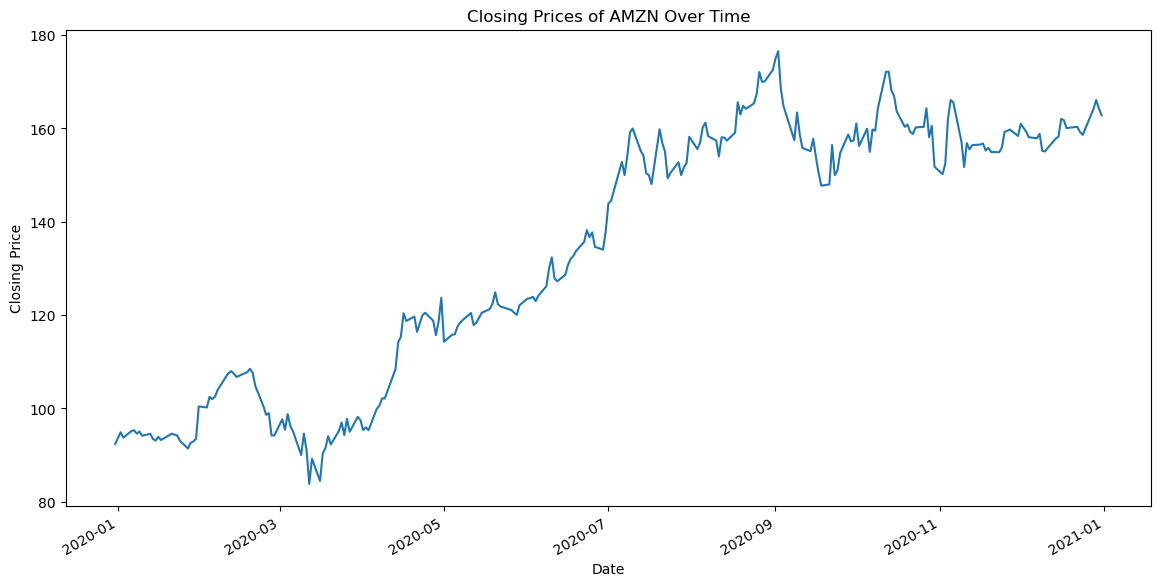


Summary statistics of the GOOG stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    73.948911   74.927242   73.077268   74.041769   74.041769   
std      8.834614    8.740315    8.938780    8.792663    8.792663   
min     52.825500   53.566002   50.676800   52.831001   52.831001   
25%     69.556000   70.593752   68.880697   69.677876   69.677876   
50%     73.553501   74.449001   72.971752   73.767002   73.767002   
75%     78.334503   79.375526   77.291626   78.419374   78.419374   
max     91.225998   92.360001   91.132500   91.399498   91.399498   

             Volume  
count  2.540000e+02  
mean   3.776039e+07  
std    1.536518e+07  
min    6.936000e+06  
25%    2.782400e+07  
50%    3.318000e+07  
75%    4.275700e+07  
max    8.658200e+07  

Missing values in the GOOG stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

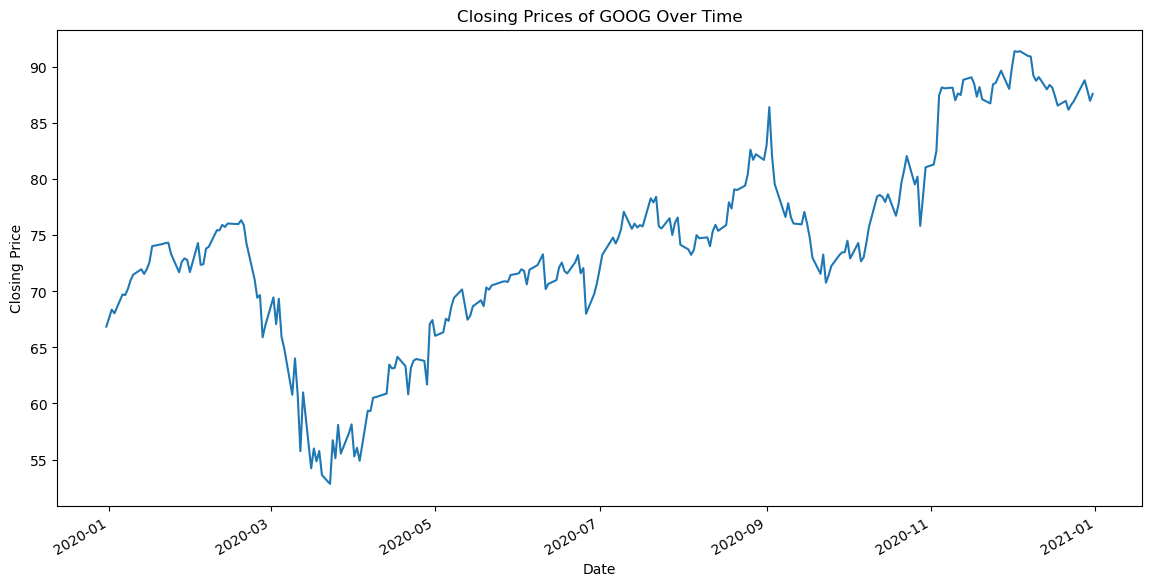


Summary statistics of the MSFT stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean   192.767953  195.316732  190.243858  192.887047  186.920004   
std     23.167684   22.713205   23.334311   23.056863   22.820841   
min    137.009995  140.570007  132.520004  135.419998  130.852295   
25%    174.132500  175.212498  170.842506  174.132504  168.074219   
50%    200.235001  203.799995  197.625000  201.605003  195.347435   
75%    212.922504  214.822498  210.232498  212.742500  206.354980   
max    229.270004  232.860001  227.350006  231.649994  225.002426   

             Volume  
count  2.540000e+02  
mean   3.758365e+07  
std    1.691521e+07  
min    1.055060e+07  
25%    2.608782e+07  
50%    3.278050e+07  
75%    4.374762e+07  
max    9.701270e+07  

Missing values in the MSFT stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

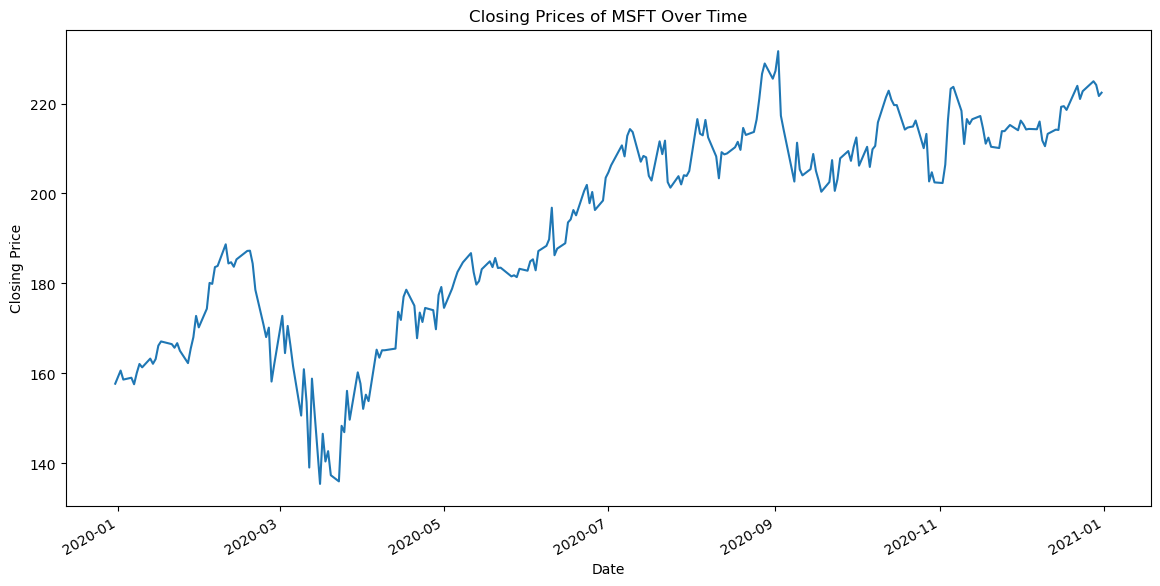


Summary statistics of the TSLA stock price dataset:
             Open        High         Low       Close   Adj Close  \
count  254.000000  254.000000  254.000000  254.000000  254.000000   
mean    96.096367   98.816569   93.303142   96.394913   96.394913   
std     55.947472   57.294582   54.503561   56.385815   56.385815   
min     24.980000   26.990667   23.367332   24.081333   24.081333   
25%     49.244500   51.554335   47.545667   49.886168   49.886168   
50%     76.815998   78.777668   75.536667   77.609665   77.609665   
75%    140.457500  143.450001  136.811668  140.381660  140.381660   
max    233.330002  239.573334  230.373337  235.223328  235.223328   

             Volume  
count  2.540000e+02  
mean   2.256418e+08  
std    1.202570e+08  
min    5.207310e+07  
25%    1.417980e+08  
50%    2.079998e+08  
75%    2.823401e+08  
max    9.140820e+08  

Missing values in the TSLA stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj

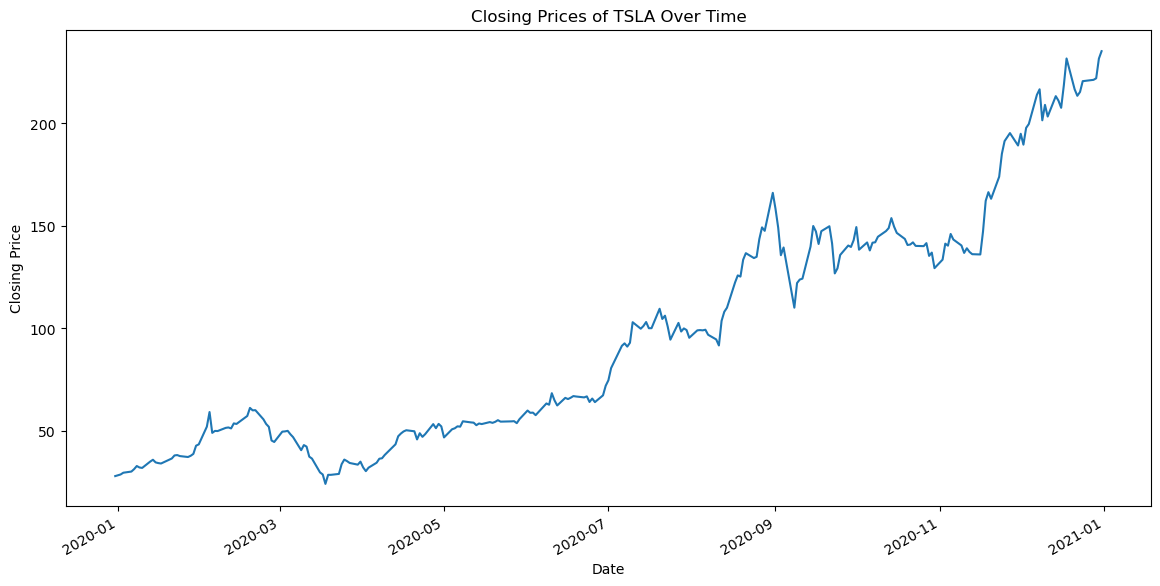

In [18]:




import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt

# Path to the zip file
zip_file_path = 'data/stock-tweet-and-price.zip'
extract_path = 'data/stock-tweet-and-price/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extracted files
extracted_files = os.listdir(extract_path)
print("Files in the extracted directory:", extracted_files)

# Assuming there is an additional nested directory
nested_extract_path = os.path.join(extract_path, 'stock-tweet-and-price')
nested_files = os.listdir(nested_extract_path)
print("Files in the nested extracted directory:", nested_files)

# Check if 'stockprice' directory exists
stockprice_dir = os.path.join(nested_extract_path, 'stockprice')
if os.path.exists(stockprice_dir) and os.path.isdir(stockprice_dir):
    stockprice_files = os.listdir(stockprice_dir)
    print("Files in the stockprice directory:", stockprice_files)
else:
    print("'stockprice' directory does not exist in the nested extracted path.")

# Correct path to 'stocktweet.csv'
tweets_csv_path = os.path.join(nested_extract_path, 'stocktweet', 'stocktweet.csv')
if os.path.exists(tweets_csv_path):
    tweets_df = pd.read_csv(tweets_csv_path)
    print("First few rows of the tweets dataset:")
    display(tweets_df.head())
else:
    print(f"{tweets_csv_path} does not exist.")

# Load stock price data for a few companies to start
companies = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA']
stock_data = {}
for company in companies:
    company_csv_path = os.path.join(stockprice_dir, f'{company}.csv')
    if os.path.exists(company_csv_path):
        stock_data[company] = pd.read_csv(company_csv_path)
        print(f"First few rows of the {company} dataset:")
        display(stock_data[company].head())
    else:
        print(f"{company_csv_path} does not exist.")

# Exploratory Data Analysis on Tweets Dataset
print("Summary statistics of the tweets dataset:")
print(tweets_df.describe())

print("\nMissing values in the tweets dataset:")
print(tweets_df.isnull().sum())

# Convert the date column to datetime with the correct format
tweets_df['date'] = pd.to_datetime(tweets_df['date'], format='%d/%m/%Y')

# Distribution of tweets over time
tweets_df['date'].value_counts().sort_index().plot(kind='line', figsize=(14, 7), title='Distribution of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

# Most frequently mentioned companies
tweets_df['ticker'].value_counts().plot(kind='bar', figsize=(14, 7), title='Most Frequently Mentioned Companies in Tweets')
plt.xlabel('Company Ticker')
plt.ylabel('Number of Mentions')
plt.show()

# Exploratory Data Analysis on Stock Price Data
for company in companies:
    print(f"\nSummary statistics of the {company} stock price dataset:")
    print(stock_data[company].describe())

    print(f"\nMissing values in the {company} stock price dataset:")
    print(stock_data[company].isnull().sum())

    # Convert the Date column to datetime
    stock_data[company]['Date'] = pd.to_datetime(stock_data[company]['Date'], format='%Y-%m-%d')

    # Plot the closing prices
    stock_data[company].set_index('Date')['Close'].plot(kind='line', figsize=(14, 7), title=f'Closing Prices of {company} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.show()








## Data Preprocessing and Cleaning

### Check for Missing Values and Drop Them

Let's first check for any missing values in the tweets dataset and the stock price datasets. We'll then drop any rows with missing values


In [32]:
# Check for missing values in tweets dataset
print("Missing values in the tweets dataset:")
print(tweets_df.isnull().sum())

# Drop missing values in tweets dataset
tweets_df = tweets_df.dropna()

# Check for missing values in stock price datasets
for company in companies:
    print(f"\nMissing values in the {company} stock price dataset:")
    print(stock_data[company].isnull().sum())
    
    # Drop missing values in stock price datasets
    stock_data[company] = stock_data[company].dropna()


Missing values in the tweets dataset:
id        0
date      0
ticker    0
tweet     0
dtype: int64

Missing values in the AAPL stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in the AMZN stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in the GOOG stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in the MSFT stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values in the TSLA stock price dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


### Feature Engineering on Tweet Text

Next, we will perform feature engineering on the tweet text. We'll use the TextBlob library for sentiment analysis to extract sentiment scores from the tweets.


In [33]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the tweet text
tweets_df['sentiment'] = tweets_df['tweet'].apply(get_sentiment)

# Display the updated tweets dataset with sentiment scores
print("First few rows of the tweets dataset with sentiment scores:")
display(tweets_df.head())


First few rows of the tweets dataset with sentiment scores:


,id,date,ticker,tweet,sentiment
0,100001,2020-01-01,AMZN,$AMZN Dow futures up by 100 points already 🥳,0.000000
1,100002,2020-01-01,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...,0.156250
2,100003,2020-01-01,AAPL,$AAPL We’ll been riding since last December fr...,0.000000
3,100004,2020-01-01,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏",0.468182
4,100005,2020-01-01,TSLA,"$TSLA haha just a collection of greats...""Mars...",0.500000


### Data Integration

Now, we will integrate the sentiment scores with the stock price data. We will aggregate the sentiment scores by date and merge them with the stock price data.


In [34]:
# Aggregate sentiment scores by date
daily_sentiment = tweets_df.groupby('date')['sentiment'].mean().reset_index()

# Merge the sentiment scores with the stock price data for each company
for company in companies:
    stock_data[company] = stock_data[company].merge(daily_sentiment, left_on='Date', right_on='date', how='left')
    stock_data[company] = stock_data[company].drop(columns=['date'])

    # Display the merged dataset
    print(f"First few rows of the merged {company} dataset:")
    display(stock_data[company].head())


First few rows of the merged AAPL dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,0.055524
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,0.156667
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200,0.161855
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,0.131440


First few rows of the merged AMZN dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000,NaN
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,0.055524
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,0.156667
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.161855
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.131440


First few rows of the merged GOOG dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000,NaN
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000,0.055524
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000,0.156667
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000,0.161855
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000,0.131440


First few rows of the merged MSFT dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400,NaN
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100,0.055524
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200,0.156667
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700,0.161855
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100,0.131440


First few rows of the merged TSLA dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500,NaN
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.055524
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.156667
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.161855
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.131440


### Verify Data Structure

Let's check the type of `stock_data[company]` to ensure it's a DataFrame.


In [41]:
# Re-load stock price data for a few companies
companies = ['AAPL', 'AMZN', 'GOOG', 'MSFT', 'TSLA']
stock_data = {}
for company in companies:
    company_csv_path = os.path.join(stockprice_dir, f'{company}.csv')
    if os.path.exists(company_csv_path):
        stock_data[company] = pd.read_csv(company_csv_path)
        print(f"First few rows of the {company} dataset:")
        display(stock_data[company].head())
    else:
        print(f"{company_csv_path} does not exist.")


First few rows of the AAPL dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000


First few rows of the AMZN dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000


First few rows of the GOOG dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000


First few rows of the MSFT dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100


First few rows of the TSLA dataset:


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


In [43]:
for company in companies:
    print(f"Type of stock_data[{company}]: {type(stock_data[company])}")
    display(stock_data[company].head())


Type of stock_data[AAPL]: <class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_3,Close_lag_7
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,NaN,NaN,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,73.412498,NaN,NaN
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,75.087502,NaN,NaN
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200,74.357498,73.412498,NaN
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,74.949997,75.087502,NaN


Type of stock_data[AMZN]: <class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000


Type of stock_data[GOOG]: <class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000


Type of stock_data[MSFT]: <class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100


Type of stock_data[TSLA]: <class 'pandas.core.frame.DataFrame'>


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500


### Feature Engineering on Tweet Text

Next, we will perform feature engineering on the tweet text. We'll use the TextBlob library for sentiment analysis to extract sentiment scores from the tweets.


In [44]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the tweet text
tweets_df['sentiment'] = tweets_df['tweet'].apply(get_sentiment)

# Display the updated tweets dataset with sentiment scores
print("First few rows of the tweets dataset with sentiment scores:")
display(tweets_df.head())


First few rows of the tweets dataset with sentiment scores:


,id,date,ticker,tweet,sentiment
0,100001,2020-01-01,AMZN,$AMZN Dow futures up by 100 points already 🥳,0.000000
1,100002,2020-01-01,TSLA,$TSLA Daddy's drinkin' eArly tonight! Here's t...,0.156250
2,100003,2020-01-01,AAPL,$AAPL We’ll been riding since last December fr...,0.000000
3,100004,2020-01-01,TSLA,"$TSLA happy new year, 2020, everyone🍷🎉🙏",0.468182
4,100005,2020-01-01,TSLA,"$TSLA haha just a collection of greats...""Mars...",0.500000


### Integrate Sentiment Scores

We will aggregate the sentiment scores by date and merge them with the stock price data.


In [46]:
# Aggregate sentiment scores by date
daily_sentiment = tweets_df.groupby('date')['sentiment'].mean().reset_index()

# Convert `date` column in `daily_sentiment` to datetime
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Merge the sentiment scores with the stock price data for each company
for company in companies:
    # Ensure the Date column in stock data is of datetime type
    stock_data[company]['Date'] = pd.to_datetime(stock_data[company]['Date'])
    
    stock_data[company] = stock_data[company].merge(daily_sentiment, left_on='Date', right_on='date', how='left')
    stock_data[company] = stock_data[company].drop(columns=['date'])

    # Display the merged dataset
    print(f"First few rows of the merged {company} dataset:")
    display(stock_data[company].head())


First few rows of the merged AAPL dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_3,Close_lag_7,sentiment_x,sentiment_y
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400,73.412498,NaN,NaN,0.055524,0.055524
2,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800,75.087502,NaN,NaN,0.156667,0.156667
3,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.018677,118387200,74.357498,73.412498,NaN,0.161855,0.161855
4,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.675278,108872000,74.949997,75.087502,NaN,0.131440,0.131440


First few rows of the merged AMZN dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000,NaN
1,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,0.055524
2,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,0.156667
3,2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.161855
4,2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.131440


First few rows of the merged GOOG dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000,NaN
1,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000,0.055524
2,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000,0.156667
3,2020-01-06,67.500000,69.824997,67.500000,69.710503,69.710503,34646000,0.161855
4,2020-01-07,69.897003,70.149498,69.518997,69.667000,69.667000,30054000,0.131440


First few rows of the merged MSFT dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400,NaN
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100,0.055524
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200,0.156667
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247330,20813700,0.161855
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850082,21634100,0.131440


First few rows of the merged TSLA dataset:


,Date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500,NaN
1,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.055524
2,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.156667
3,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.161855
4,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.131440


### Integrate Sentiment Scores using `pd.concat`

We will aggregate the sentiment scores by date and merge them with the stock price data using `pd.concat`.


In [47]:
# Aggregate sentiment scores by date
daily_sentiment = tweets_df.groupby('date')['sentiment'].mean().reset_index()

# Convert `date` column in `daily_sentiment` to datetime
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Set date as index in daily_sentiment
daily_sentiment = daily_sentiment.set_index('date')

# Merge the sentiment scores with the stock price data for each company
for company in companies:
    # Ensure the Date column in stock data is of datetime type
    stock_data[company]['Date'] = pd.to_datetime(stock_data[company]['Date'])
    
    # Set Date as index in stock data
    stock_data[company] = stock_data[company].set_index('Date')
    
    # Concatenate the data
    stock_data[company] = pd.concat([stock_data[company], daily_sentiment], axis=1)
    
    # Reset the index to Date
    stock_data[company] = stock_data[company].reset_index()

    # Display the merged dataset
    print(f"First few rows of the merged {company} dataset:")
    display(stock_data[company].head())


First few rows of the merged AAPL dataset:


,index,Open,High,Low,Close,Adj Close,Volume,Close_lag_1,Close_lag_3,Close_lag_7,sentiment_x,sentiment_y,sentiment
0,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.520821,100805600.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154072
2,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.152649,135480400.0,73.412498,NaN,NaN,0.055524,0.055524,0.055524
3,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.441460,146322800.0,75.087502,NaN,NaN,0.156667,0.156667,0.156667
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050000


First few rows of the merged AMZN dataset:


,index,Open,High,Low,Close,Adj Close,Volume,sentiment,sentiment
0,2019-12-31,92.099998,92.663002,91.611504,92.391998,92.391998,50130000.0,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154072
2,2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000.0,0.055524,0.055524
3,2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000.0,0.156667,0.156667
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050000


First few rows of the merged GOOG dataset:


,index,Open,High,Low,Close,Adj Close,Volume,sentiment,sentiment
0,2019-12-31,66.505501,66.900002,66.454247,66.850998,66.850998,19236000.0,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154072
2,2020-01-02,67.077499,68.406998,67.077499,68.368500,68.368500,28132000.0,0.055524,0.055524
3,2020-01-03,67.392998,68.625000,67.277199,68.032997,68.032997,23728000.0,0.156667,0.156667
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050000


First few rows of the merged MSFT dataset:


,index,Open,High,Low,Close,Adj Close,Volume,sentiment,sentiment
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,151.965683,18369400.0,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154072
2,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779495,22622100.0,0.055524,0.055524
3,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200.0,0.156667,0.156667
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050000


First few rows of the merged TSLA dataset:


,index,Open,High,Low,Close,Adj Close,Volume,sentiment,sentiment
0,2019-12-31,27.000000,28.086000,26.805332,27.888666,27.888666,154285500.0,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154072
2,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500.0,0.055524,0.055524
3,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500.0,0.156667,0.156667
4,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.050000


### Prepare Data for Time Series Forecasting

We'll create lag features for the stock prices and sentiment scores, rename the 'index' column to 'Date', and split the data into training and testing sets.


In [63]:
from sklearn.model_selection import train_test_split

# Function to create lag features
def create_lag_features(df, lags, target_col):
    for lag in lags:
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
    return df

# Define the lags and the target column
lags = [1, 3, 7]
target_col = 'Close'

# Prepare the data for each company
prepared_stock_data = {}
for company in companies:
    df = stock_data[company]
    
    # Ensure the Date column is of datetime type
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Create lag features for the Close price and sentiment
    df = create_lag_features(df, lags, target_col)
    df = create_lag_features(df, lags, 'sentiment')
    
    # Drop rows with NaN values created by the lag features
    df = df.dropna()
    
    # Set Date as index
    df = df.set_index('Date')
    
    # Split the data into training and testing sets
    X = df.drop(columns=['Close'])
    y = df['Close']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Store the prepared data
    prepared_stock_data[company] = (X_train, X_test, y_train, y_test)

    print(f"Prepared data for {company}:")
    print("X_train:")
    display(X_train.head())
    print("y_train:")
    display(y_train.head())


Prepared data for AAPL:
X_train:


,Open,High,Low,Adj Close,Volume,Close_lag_1,Close_lag_3,Close_lag_7,sentiment,sentiment_lag_1,sentiment_lag_3,sentiment_lag_7
Date,,,,,,,,,,,,
2020-01-10,77.650002,78.167503,77.062500,75.583344,140644800.0,77.407501,74.597504,75.087502,0.179668,0.240034,0.131440,0.055524
2020-01-16,78.397499,78.925003,78.022499,76.779221,108829200.0,77.834999,79.239998,77.407501,0.010063,0.102847,0.047292,0.240034
2020-01-17,79.067497,79.684998,78.750000,77.629234,137816400.0,78.809998,78.169998,77.582497,0.131451,0.010063,0.138193,0.179668
2020-01-24,80.062500,80.832497,79.379997,77.526955,146537600.0,79.807503,79.142502,78.809998,0.210377,0.076713,0.073390,0.010063
2020-01-30,80.135002,81.022499,79.687500,78.881126,126743200.0,81.084999,77.237503,79.425003,0.121482,0.104770,0.175000,0.074980


y_train:


Date
2020-01-10    77.582497
2020-01-16    78.809998
2020-01-17    79.682503
2020-01-24    79.577499
2020-01-30    80.967499
Name: Close, dtype: float64

ValueError: Cannot set a DataFrame with multiple columns to the single column sentiment_lag_1